In [1]:
import numpy as np
from sklearn.manifold import TSNE

In [2]:
X = np.array([[0,0,0],[0,1,1],[1,0,1],[1,1,1]])
X_embedded = TSNE(n_components=2).fit_transform(X)
X_embedded.shape


print(X)
print(X_embedded)

[[0 0 0]
 [0 1 1]
 [1 0 1]
 [1 1 1]]
[[-211.2460022  -232.44284058]
 [-215.19537354 -133.02101135]
 [-314.61709595 -136.97236633]
 [-310.66772461 -236.39416504]]


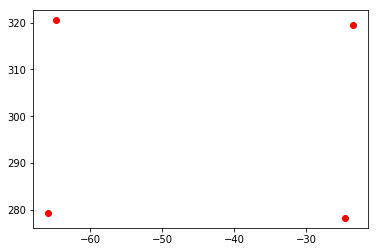

In [41]:
import matplotlib.pyplot as plt

X = []
Y = []
for num in X_embedded:
    X.append(num[0])
    Y.append(num[1])

plt.plot(X,Y, 'ro')

plt.show()

### t-SNE: The effect of various perplexity values on the shape

In [43]:
print(__doc__)

Automatically created module for IPython interactive environment


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import manifold, datasets
from time import time
from matplotlib.ticker import NullFormatter

circles, perplexity=5 in 3 sec
circles, perplexity=30 in 4.8 sec
circles, perplexity=50 in 7 sec
circles, perplexity=100 in 9.5 sec
S-curve, perplexity=5 in 2.8 sec
S-curve, perplexity=30 in 5.5 sec
S-curve, perplexity=50 in 6.4 sec
S-curve, perplexity=100 in 8 sec
uniform grid, perplexity=5 in 2.8 sec
uniform grid, perplexity=30 in 5.4 sec
uniform grid, perplexity=50 in 7.5 sec
uniform grid, perplexity=100 in 9.9 sec


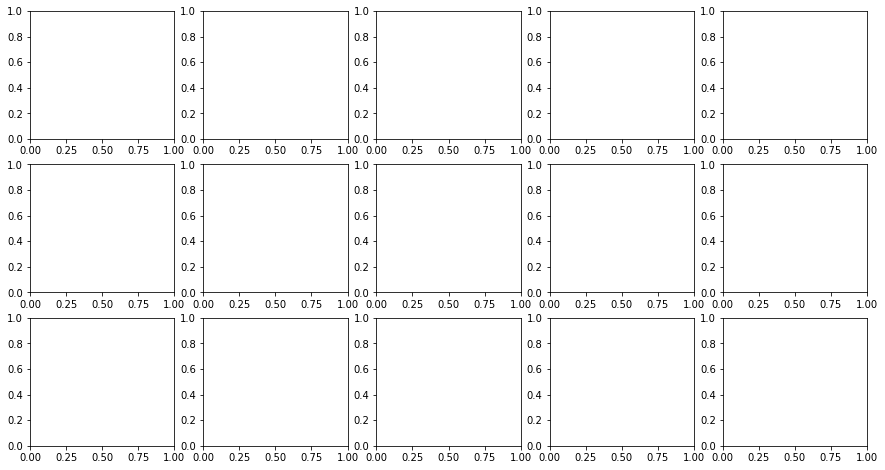

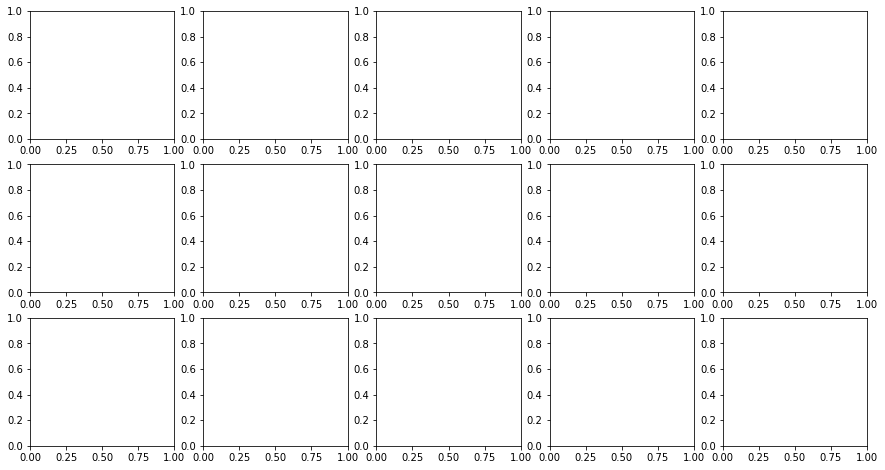

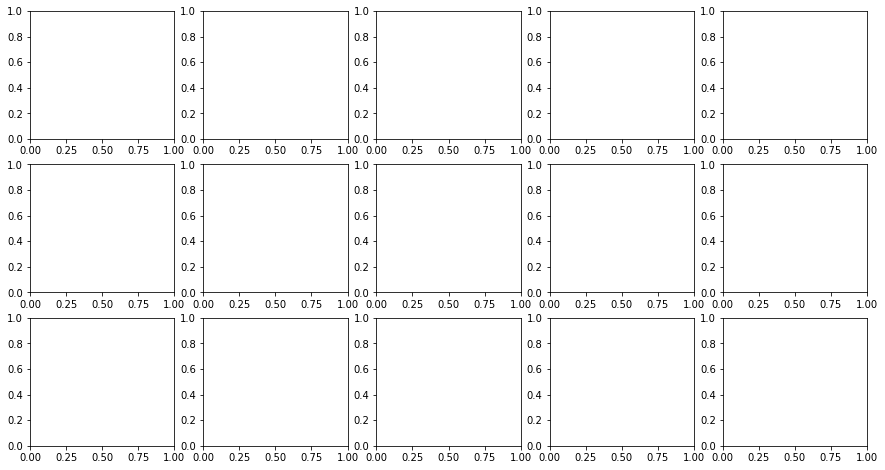

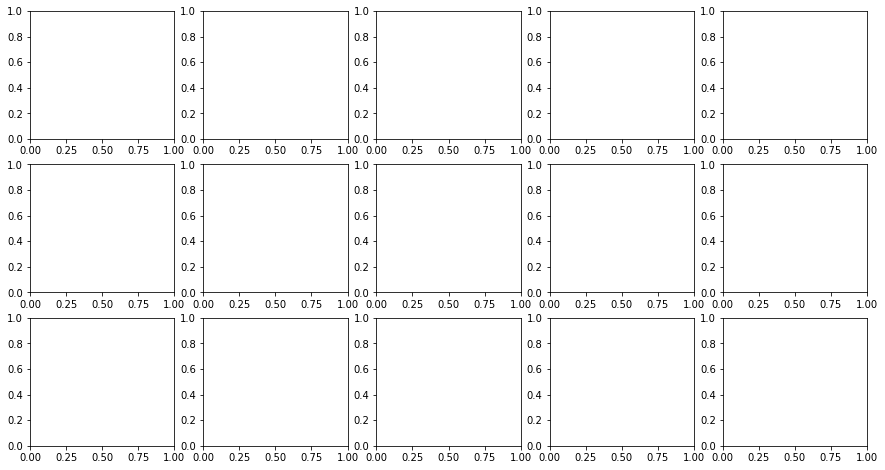

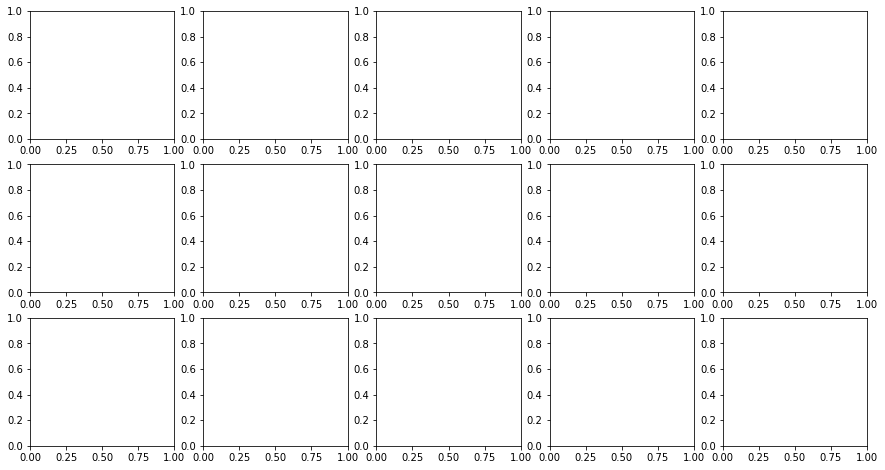

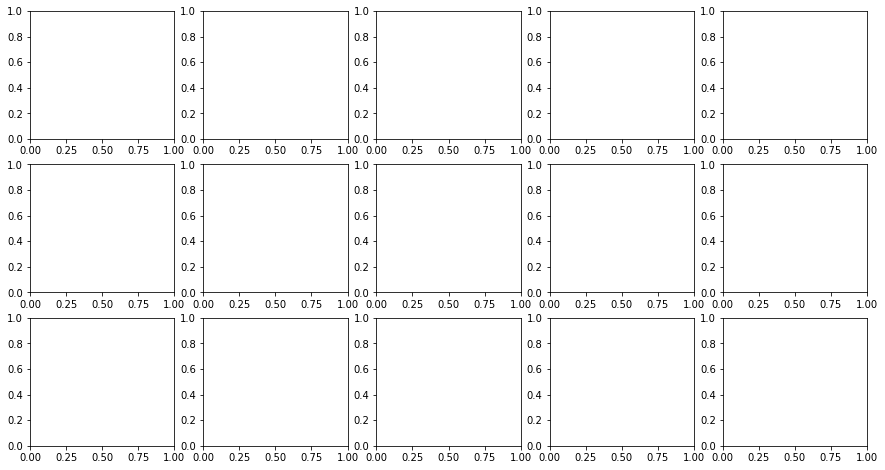

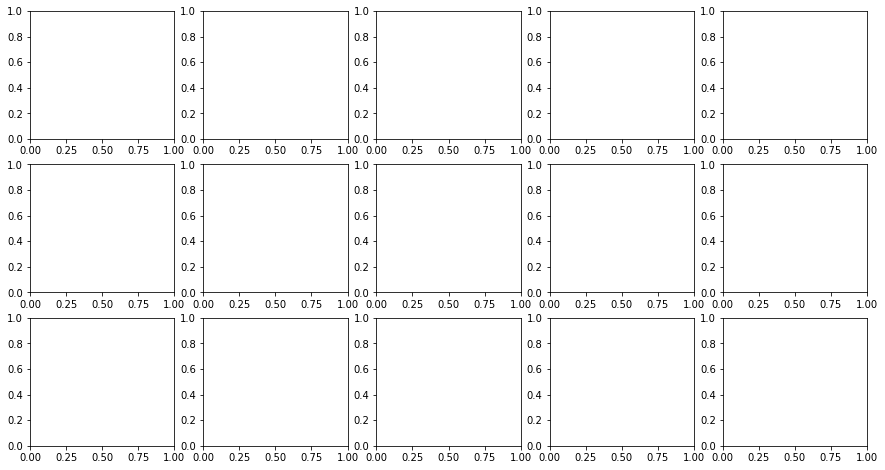

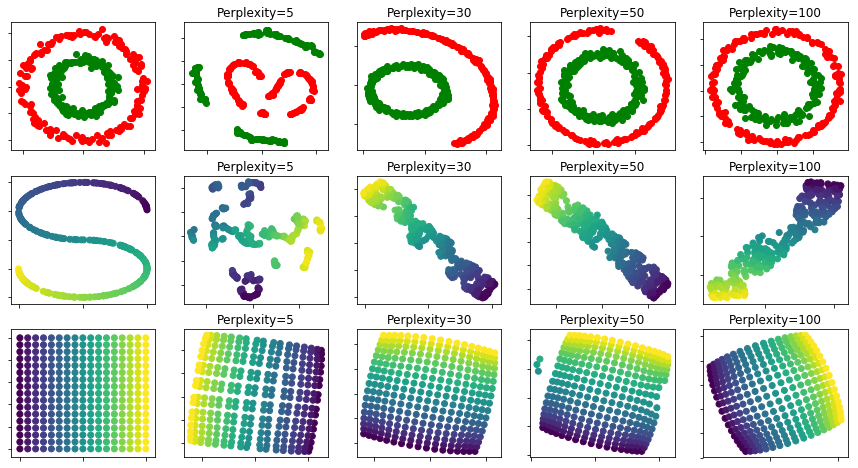

In [9]:

n_samples = 300
n_components = 2
(fig, subplots) = plt.subplots(3, 5, figsize=(15, 8))
perplexities = [5, 30, 50, 100]

X, y = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)

red = y == 0
green = y == 1

ax = subplots[0][0]
ax.scatter(X[red, 0], X[red, 1], c="r")
ax.scatter(X[green, 0], X[green, 1], c="g")
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

for i, perplexity in enumerate(perplexities):
    ax = subplots[0][i + 1]

    t0 = time()
    tsne = manifold.TSNE(n_components=n_components, init='random',
                         random_state=0, perplexity=perplexity)
    Y = tsne.fit_transform(X)
    t1 = time()
    print("circles, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))
    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[red, 0], Y[red, 1], c="r")
    ax.scatter(Y[green, 0], Y[green, 1], c="g")
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')

# Another example using s-curve
X, color = datasets.samples_generator.make_s_curve(n_samples, random_state=0)

ax = subplots[1][0]
ax.scatter(X[:, 0], X[:, 2], c=color)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())

for i, perplexity in enumerate(perplexities):
    ax = subplots[1][i + 1]

    t0 = time()
    tsne = manifold.TSNE(n_components=n_components, init='random',
                         random_state=0, perplexity=perplexity)
    Y = tsne.fit_transform(X)
    t1 = time()
    print("S-curve, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))

    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[:, 0], Y[:, 1], c=color)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')


# Another example using a 2D uniform grid
x = np.linspace(0, 1, int(np.sqrt(n_samples)))
xx, yy = np.meshgrid(x, x)
X = np.hstack([
    xx.ravel().reshape(-1, 1),
    yy.ravel().reshape(-1, 1),
])
color = xx.ravel()
ax = subplots[2][0]
ax.scatter(X[:, 0], X[:, 1], c=color)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())

for i, perplexity in enumerate(perplexities):
    ax = subplots[2][i + 1]

    t0 = time()
    tsne = manifold.TSNE(n_components=n_components, init='random',
                         random_state=0, perplexity=perplexity)
    Y = tsne.fit_transform(X)
    t1 = time()
    print("uniform grid, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))

    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[:, 0], Y[:, 1], c=color)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')


plt.show()